In [1]:
from src.visualizer import visualize_dataset, visualize_dataloader, visualize_results
from src.loops import ModelTrainer
from src.Data.get_dataset import download_VOC
from src.Data.get_dataloader import get_dataloader 
from src.models.resnet_image import ResNet6_images, ResidualBlock
from src.utils.dice_loss import dice_loss
from src.models.node_image import ODENet
from src.models.rknet_image import RKNet

In [2]:
import torch
if torch.cuda.is_available(): 
    dev = "cuda" 
else: 
    dev = "cpu"
    print("only cpu available") 
device = torch.device(dev) 

device = "cpu"

only cpu available


In [3]:
voc_trainset, voc_valset = download_VOC()

Using downloaded and verified file: C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set\VOCtrainval_11-May-2012.tar
Extracting C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set\VOCtrainval_11-May-2012.tar to C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set
Using downloaded and verified file: C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set\VOCtrainval_11-May-2012.tar
Extracting C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set\VOCtrainval_11-May-2012.tar to C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set


In [4]:
verbose = False
load = False
run_tasks = True
save = False
test_tasks=True

In [5]:
import numpy as np
if verbose:
    possible_val = np.empty((0))
    for i in range(len(voc_trainset)):

        image, mask = voc_trainset[i]
        possible_val = np.unique(np.append(possible_val, np.unique(mask)))
    print(possible_val)
    print("unique number in masks ", len(possible_val))

In [6]:
if verbose:
    visualize_dataset(voc_trainset)
    visualize_dataset(voc_valset)

In [7]:
voc_train_loader = get_dataloader(voc_trainset, out_size=256, batch_size=32)
voc_val_loader = get_dataloader(voc_valset, out_size=256, batch_size=32)

In [8]:
if verbose:
    visualize_dataloader(voc_train_loader)
    visualize_dataloader(voc_val_loader)

In [9]:
import os
import torch.nn as nn
in_channels = 3
out_channels = 1
model_resnet = ResNet6_images(in_channels, out_channels).to(device)
model_node = ODENet(in_channels, out_channels).to(device)
model_rknet = RKNet(in_channels, out_channels).to(device)
weights = torch.ones(21).to(device) * 10.
weights[0] = 1.
lossf = nn.CrossEntropyLoss(weight=weights)
learning_rate = 0.01
num_epochs = 50
print_interval = 25
model_filepath =  os.path.join(os.getcwd(), "src\\model_trained\\" ) 

In [10]:
trainer_resnet = ModelTrainer(voc_train_loader, voc_val_loader, model_resnet, lossf, learning_rate, num_epochs, print_interval, os.path.join(model_filepath, "resnet.pt" ), device)
trainer_node = ModelTrainer(voc_train_loader, voc_val_loader, model_node, lossf, learning_rate, num_epochs, print_interval, os.path.join(model_filepath, "node.pt"), device)
trainer_rknet = ModelTrainer(voc_train_loader, voc_val_loader, model_rknet, lossf, learning_rate, num_epochs, print_interval, os.path.join(model_filepath, "rknet.pt"), device)

In [11]:
if load:
    trainer_resnet.load_model()
    trainer_node.load_model()
    trainer_rknet.load_model()

In [12]:
if run_tasks:
    for cur_model in [trainer_resnet, trainer_node, trainer_rknet]:
        cur_model.train()
        if save:
            cur_model.save_model()

torch.Size([32, 1, 254, 254])


RuntimeError: only batches of spatial targets supported (3D tensors) but got targets of dimension: 4

In [ ]:
if test_tasks:
    trainer_resnet.test()
    trainer_node.test() 
    trainer_rknet.test()

KeyboardInterrupt: 

resnet


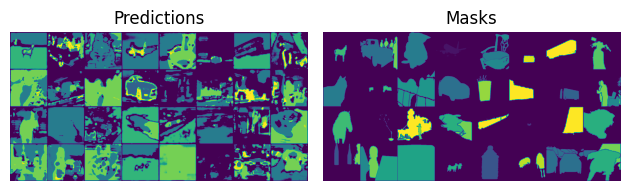

----------------------------


KeyboardInterrupt: 

In [ ]:
if verbose:
    predicts, masks = trainer_resnet.predict()
    print("resnet")
    visualize_results(predicts, masks)
    print("----------------------------")

    predicts, masks = trainer_node.predict()
    print("node")
    visualize_results(predicts, masks)
    print("----------------------------")

    predicts, masks = trainer_rknet.predict()
    print("rknet")
    visualize_results(predicts, masks)
    print("----------------------------")